# FreshGoGo Two Months Sales DataSet Analytic 

In [57]:
import numpy as np                               # 向量和矩阵运算
import pandas as pd                              # 表格与数据处理
import matplotlib.pyplot as plt                  # 绘图
import seaborn as sns                            # 更多绘图功能
sns.set()

from dateutil.relativedelta import relativedelta # 日期数据处理
from scipy.optimize import minimize              # 优化函数

import statsmodels.formula.api as smf            # 数理统计
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # 一些有用的函数
from tqdm import tqdm_notebook

In [28]:
#Sales 20200629-0712 as file 1
#Sales 20200713-0726 as file 2
file1=open(r"/Users/annettechiu/Desktop/FreshGoGo/Order+data+20200629-20200712.csv",encoding='utf-8')
file2=open(r"/Users/annettechiu/Desktop/FreshGoGo/Order+data+20200713-20200726.csv",encoding='utf-8')
freshgogo1 = pd.read_csv(file1)
freshgogo2 = pd.read_csv(file2)

In [29]:
freshgogo1.head(2)

,Order Number,Order Time,Cust ID,Delivery Date,订单投诉,Status,Total Price,Payment,Voucher Discount,Voucher,...,Customer Service,OS of App,Unnamed: 17,冷链包装费,支付宝手续费,会员券,配送费,到家/自提,班次,服务费
0,1594699128,6/29/2020 0:00,55586018823,7/16/2020,NaN,已送达,119.95,信用卡支付,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,0.00,自提,NY,0
1,1598776640,6/29/2020 0:03,58991718899,7/2/2020,NaN,已送达,147.34,信用卡支付,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,6.99,到家,NY,0


In [30]:
freshgogo2.head(20)

,Order Number,Order Time,用户ID,Delivery Date,订单投诉,Status,Total Price,Payment,Voucher Discount,Voucher,...,Customer Service,OS of App,Unnamed: 17,冷链包装费,支付宝手续费,会员券,配送费,到家/自提,班次,服务费
0,1601116468,7/13/2020 0:00,58351892017,7/22/2020,NaN,已送达,118.18,信用卡支付,NaN,NaN,...,R-商品变质,ios,2.3.1,1.5,NaN,5,0.00,自提,DC,0
1,1602472924,7/13/2020 0:01,55085937222,7/18/2020,NaN,已送达,298.84,余额支付,NaN,NaN,...,NaN,ios,2.3.1,1.5,NaN,5,0.00,自提,OT,0
2,1599126052,7/13/2020 0:01,56291750175,7/16/2020,NaN,已送达,165.81,信用卡支付,NaN,NaN,...,NaN,pc下单,NaN,1.5,NaN,0,9.99,到家,NY,0
3,1597482400,7/13/2020 0:06,58824880640,7/18/2020,FGG责任,退款已完成,174.53,信用卡支付,NaN,NaN,...,R-商品变质,ios,2.3.1,1.5,NaN,0,0.00,自提,OT,0
4,1595911970,7/13/2020 0:06,53724030573,7/15/2020,NaN,已送达,207.03,信用卡支付,NaN,NaN,...,R-其他,pc下单,NaN,1.5,NaN,0,6.99,到家,DC,0
5,1601415235,7/13/2020 0:08,52620173266,7/16/2020,NaN,已送达,199.14,余额支付,NaN,NaN,...,NaN,ios,2.3.1,1.5,NaN,5,9.99,到家,NY,0
6,1595158375,7/13/2020 0:10,53085748946,7/18/2020,NaN,已送达,171.39,信用卡支付,NaN,NaN,...,NaN,ios,2.3.1,NaN,NaN,0,9.99,到家,Boston,0
7,1601736879,7/13/2020 0:19,58920218907,7/15/2020,NaN,已送达,264.84,信用卡支付,NaN,NaN,...,NaN,pc下单,NaN,1.5,NaN,0,6.99,到家,DC,0
8,1599385615,7/13/2020 0:19,56364660306,7/16/2020,NaN,已送达,100.46,PayPal,NaN,NaN,...,NaN,ios,2.3.1,1.5,NaN,0,9.99,到家,NY,0
9,1600061639,7/13/2020 0:19,59741256600,7/16/2020,普通投诉,已送达,190.00,余额支付,NaN,NaN,...,R-包装损坏,ios,2.3.1,1.5,NaN,0,9.99,到家,NY,0


In [31]:
frames = [freshgogo1, freshgogo2]
result = pd.concat(frames)

In [32]:
result.head(2)

,Order Number,Order Time,Cust ID,Delivery Date,订单投诉,Status,Total Price,Payment,Voucher Discount,Voucher,...,OS of App,Unnamed: 17,冷链包装费,支付宝手续费,会员券,配送费,到家/自提,班次,服务费,用户ID
0,1594699128,6/29/2020 0:00,5.558602e+10,7/16/2020,NaN,已送达,119.95,信用卡支付,NaN,NaN,...,ios,2.3.0,1.5,NaN,0,0.00,自提,NY,0,NaN
1,1598776640,6/29/2020 0:03,5.899172e+10,7/2/2020,NaN,已送达,147.34,信用卡支付,NaN,NaN,...,ios,2.3.0,1.5,NaN,0,6.99,到家,NY,0,NaN


In [33]:
result.to_pickle('/Users/annettechiu/Desktop/FreshGoGo/Order+data+20200629-20200726.csv')

In [34]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24050 entries, 0 to 11955
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Number      24050 non-null  int64  
 1   Order Time        24050 non-null  object 
 2   Cust ID           12094 non-null  float64
 3   Delivery Date     24050 non-null  object 
 4   订单投诉              1035 non-null   object 
 5   Status            24050 non-null  object 
 6   Total Price       24050 non-null  float64
 7   Payment           24050 non-null  object 
 8   Voucher Discount  705 non-null    float64
 9   Voucher           705 non-null    object 
 10  Coupon Discount   54 non-null     float64
 11  Coupon            54 non-null     object 
 12  Tax Price         24050 non-null  float64
 13  Final Price       24050 non-null  float64
 14  Refund            12761 non-null  float64
 15  Customer Service  1514 non-null   object 
 16  OS of App         24050 non-null  object

In [35]:
result.isnull().sum(axis=0)

Order Number            0
Order Time              0
Cust ID             11956
Delivery Date           0
订单投诉                23015
Status                  0
Total Price             0
Payment                 0
Voucher Discount    23345
Voucher             23345
Coupon Discount     23996
Coupon              23996
Tax Price               0
Final Price             0
Refund              11289
Customer Service    22536
OS of App               0
Unnamed: 17          6058
冷链包装费                2914
支付宝手续费              22511
会员券                     0
配送费                     0
到家/自提                   0
班次                      0
服务费                     0
用户ID                12094
dtype: int64

In [36]:
result.drop(["Unnamed: 17","Refund","支付宝手续费"],axis=1, inplace=True)

In [37]:
dt= result['Order Time'].astype(str) #转换成字符串格式

In [38]:
dt

0         6/29/2020 0:00
1         6/29/2020 0:03
2         6/29/2020 0:04
3         6/29/2020 0:04
4         6/29/2020 0:08
              ...       
11951    7/26/2020 23:55
11952    7/26/2020 23:57
11953    7/26/2020 23:58
11954    7/26/2020 23:59
11955    7/26/2020 23:59
Name: Order Time, Length: 24050, dtype: object

In [40]:
dt = dt.apply(lambda x:datetime.strptime(x,'%m/%d/%Y %H:%M'))

In [52]:
result['month'] = dt.map(lambda x: x.month) #获取月份，并添加列month
result['year'] = dt.map(lambda x: x.year)
result['day'] = dt.map(lambda x: x.day)
result['hour'] = dt.map(lambda x: x.hour)
result['minute'] = dt.map(lambda x: x.minute)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24050 entries, 0 to 11955
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Number      24050 non-null  int64  
 1   Order Time        24050 non-null  object 
 2   Cust ID           12094 non-null  float64
 3   Delivery Date     24050 non-null  object 
 4   订单投诉              1035 non-null   object 
 5   Status            24050 non-null  object 
 6   Total Price       24050 non-null  float64
 7   Payment           24050 non-null  object 
 8   Voucher Discount  705 non-null    float64
 9   Voucher           705 non-null    object 
 10  Coupon Discount   54 non-null     float64
 11  Coupon            54 non-null     object 
 12  Tax Price         24050 non-null  float64
 13  Final Price       24050 non-null  float64
 14  Customer Service  1514 non-null   object 
 15  OS of App         24050 non-null  object 
 16  冷链包装费             21136 non-null  float6

In [53]:
#对data进行按Order Date日期进行排序
fg_result=result.sort_values(by='Order Time',ascending=True,na_position='first')#把转化异常的数据放上面

In [54]:
#选取销售分析数据子集
sales_data=result[['Order Time','Total Price','Final Price','year','month','date','minute']]
sales_data.head()


,Order Time,Total Price,Final Price,year,month,date,minute
0,6/29/2020 0:00,119.95,121.45,2020,6,<built-in method date of Timestamp object at 0...,0
1,6/29/2020 0:03,147.34,160.29,2020,6,<built-in method date of Timestamp object at 0...,3
2,6/29/2020 0:04,89.30,86.53,2020,6,<built-in method date of Timestamp object at 0...,4
3,6/29/2020 0:04,45.45,59.18,2020,6,<built-in method date of Timestamp object at 0...,4
4,6/29/2020 0:08,247.80,262.20,2020,6,<built-in method date of Timestamp object at 0...,8


In [59]:
sales_year = sales_data.groupby(['year','month']).sum()
sales_year

Total Price  Final Price  minute
year month                                  
2020 6        227987.04    242263.65   51958
     7       2818611.16   2994082.08  668691

In [56]:
import seaborn as sns

In [66]:
sales = pd.read_csv('/Users/annettechiu/Desktop/FreshGoGo/Order+data+20200629-20200712.csv', index_col=['Order Time'], parse_dates=['Order Time'])
sales.head()

,Order Number,Cust ID,Delivery Date,订单投诉,Status,Total Price,Payment,Voucher Discount,Voucher,Coupon Discount,...,Customer Service,OS of App,Unnamed: 17,冷链包装费,支付宝手续费,会员券,配送费,到家/自提,班次,服务费
Order Time,,,,,,,,,,,,,,,,,,,,,
2020-06-29 00:00:00,1594699128,55586018823,7/16/2020,NaN,已送达,119.95,信用卡支付,NaN,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,0.00,自提,NY,0
2020-06-29 00:03:00,1598776640,58991718899,7/2/2020,NaN,已送达,147.34,信用卡支付,NaN,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,6.99,到家,NY,0
2020-06-29 00:04:00,1597710951,57851868718,7/4/2020,NaN,已送达,89.30,信用卡支付,5.0,新FAF【邀请有礼】【被邀请人】满$25减$5 活动至20201231结束,NaN,...,NaN,android,2.3.0,1.5,NaN,0,0.00,自提,OT,0
2020-06-29 00:04:00,1595995162,58431571996,7/2/2020,NaN,已送达,45.45,PayPal,NaN,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,9.99,到家,NY,2
2020-06-29 00:08:00,1602053507,59691743730,7/5/2020,FGG责任,已送达,247.80,信用卡支付,NaN,NaN,NaN,...,R-质量问题,ios,2.3.0,1.5,NaN,0,9.99,到家,NY,0


In [70]:
sales_data=sales[['Total Price','Final Price']]
sales_data.head()

,Total Price,Final Price
Order Time,,
2020-06-29 00:00:00,119.95,121.45
2020-06-29 00:03:00,147.34,160.29
2020-06-29 00:04:00,89.30,86.53
2020-06-29 00:04:00,45.45,59.18
2020-06-29 00:08:00,247.80,262.20


In [72]:
sales_data.columns=['Total','Final']

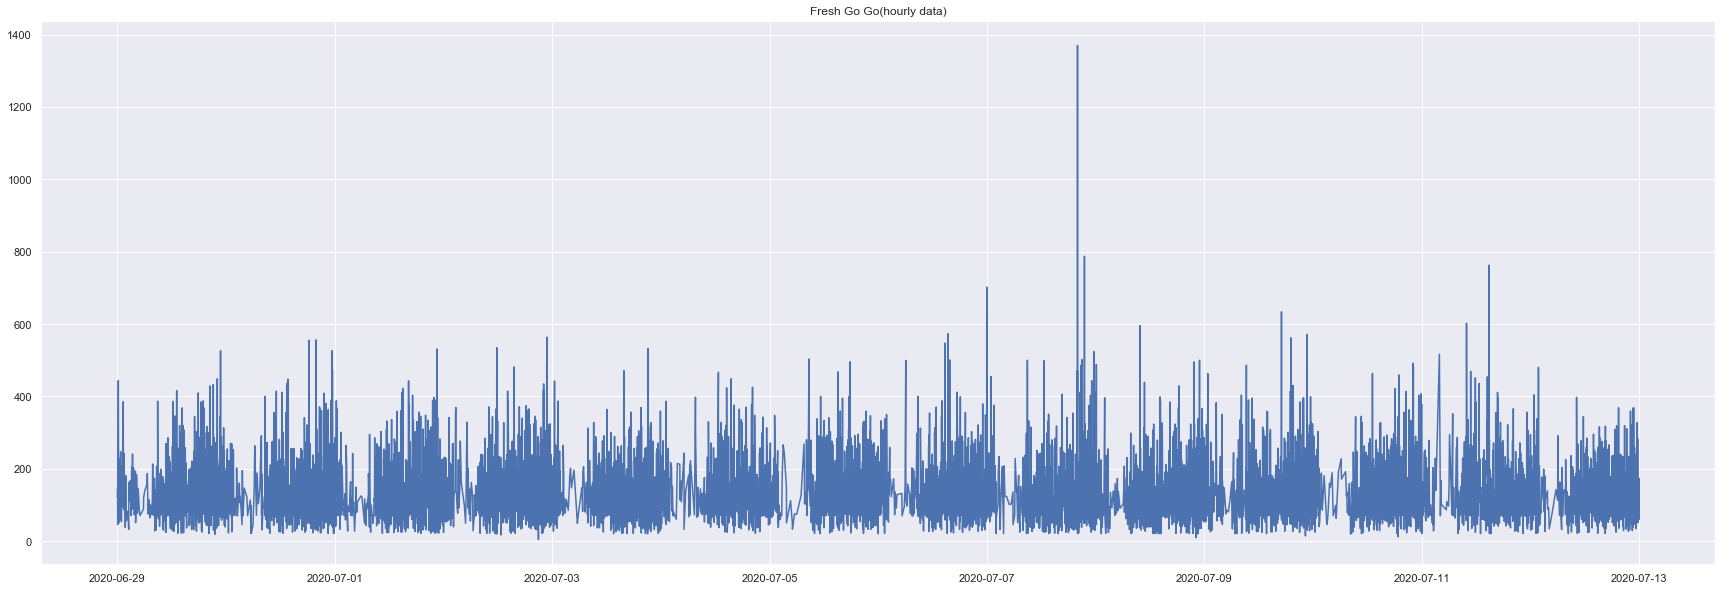

In [82]:
plt.figure(figsize=(30, 10))
plt.plot(sales_data.Total)
plt.title('Fresh Go Go(hourly data)')
plt.grid(True)
plt.show()

In [ ]:
Market_Sales = superdata_order.groupby(['Market','Country','State']).agg({'Sales':'sum'})
Market_Sales["percent"] = Market_Sales["Sales"] /superdata_order["Sales"].sum()
Market_Sales.style.background_gradient()